In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.interpolate import CubicSpline
from scipy.stats import t
from IPython.display import Math
from sympy import *
alpha = 0.95
pd.set_option('future.no_silent_downcasting', True)

text_y = "253,7 385,3 515,5 633,7 340 480,8 610,2 777,8 436,5 601,18 775 1004,8 517,8 744,3 990 1313,5"
lst = list(map(float,text_y.replace(',','.').split()))
y = np.array(lst)

y_n = y.reshape(4,4)
origin_data = pd.DataFrame(y_n, columns=[1,2,3,4],index=[2002,2003,2004,2005])
display(origin_data)



n_new = 1 # rows to add at the bottom

,1,2,3,4
2002,253.7,385.30,515.5,633.7
2003,340.0,480.80,610.2,777.8
2004,436.5,601.18,775.0,1004.8
2005,517.8,744.30,990.0,1313.5


<IPython.core.display.Math object>

,y_t
t,
1,253.70
2,385.30
3,515.50
4,633.70
5,340.00
6,480.80
7,610.20
8,777.80
9,436.50


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,y_t,(y_t - _y)**2,y_t-1,1,y_t-2,2,y_t-3,3,y_t-4,4
t,,,,,,,,,,
1,253.70,156068.453025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,385.30,69408.537025,253.70,104079.215025,NaN,NaN,NaN,NaN,NaN,NaN
3,515.50,17756.895025,385.30,35106.696025,253.70,52643.054025,NaN,NaN,NaN,NaN
4,633.70,226.653025,515.50,2006.154025,385.30,3966.315025,253.70,5947.553025,NaN,NaN
5,340.00,95329.650025,633.70,4648.306525,515.50,41143.147525,385.30,81343.048525,253.70,121975.206525
6,480.80,28208.882025,340.00,51856.946025,633.70,2528.562525,515.50,22380.843525,385.30,44248.584525
7,610.20,1486.488025,480.80,6475.505025,340.00,11904.049025,633.70,580.445525,515.50,5137.646525
8,777.80,16652.612025,610.20,-4975.329975,480.80,-21673.752975,340.00,-39843.288975,633.70,-1942.772475
9,436.50,45052.185025,777.80,-27390.446475,610.20,8183.491525,480.80,35649.288525,340.00,65534.792525


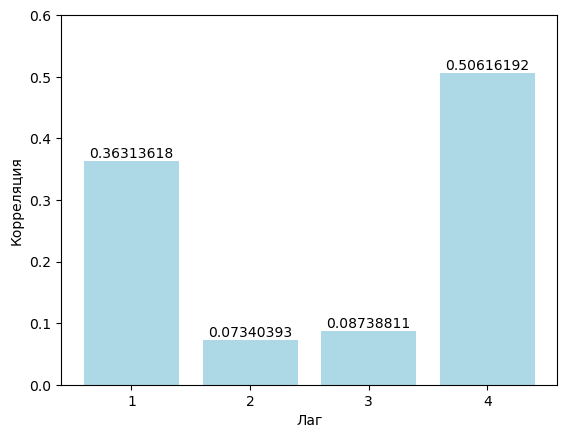

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

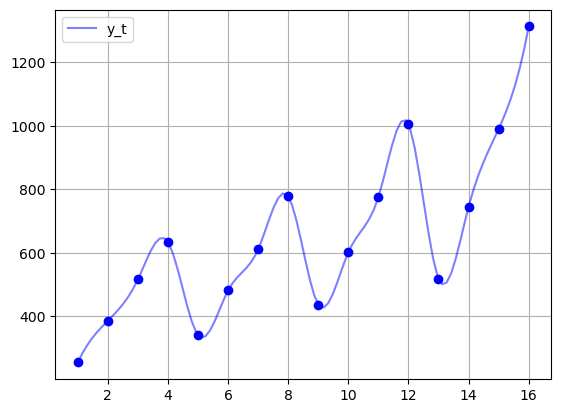

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,y_t,4k,yc_t,_ycc_t,mark
0,253.70,<NA>,<NA>,<NA>,<NA>
1,385.30,<NA>,<NA>,<NA>,<NA>
2,515.50,1788.2,447.05,457.8375,57.6625
3,633.70,1874.5,468.625,480.5625,153.1375
4,340.00,1970.0,492.5,504.3375,-164.3375
5,480.80,2064.7,516.175,534.1875,-53.3875
6,610.20,2208.8,552.2,564.2625,45.9375
7,777.80,2305.3,576.325,591.3725,186.4275
8,436.50,2425.68,606.42,627.02,-190.52
9,601.18,2590.48,647.62,675.995,-74.815


<IPython.core.display.Math object>

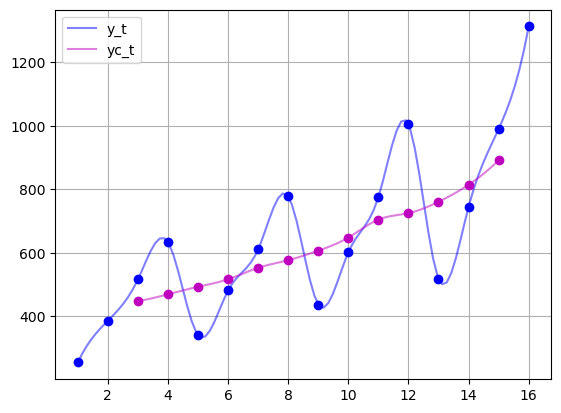

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

array([[   0.    ,    0.    ,   57.6625,  153.1375],
       [-164.3375,  -53.3875,   45.9375,  186.4275],
       [-190.52  ,  -74.815 ,   60.4675,  262.215 ],
       [-269.55  , -108.5125,    0.    ,    0.    ]])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,y_t,S
t,,
1,253.70,-200.196250
2,385.30,-70.965417
3,515.50,62.628750
4,633.70,208.532917
5,340.00,-200.196250
6,480.80,-70.965417
7,610.20,62.628750
8,777.80,208.532917
9,436.50,-200.196250


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,y_t,S,T+E
t,,,
1,253.70,-200.196250,453.896250
2,385.30,-70.965417,456.265417
3,515.50,62.628750,452.871250
4,633.70,208.532917,425.167083
5,340.00,-200.196250,540.196250
6,480.80,-70.965417,551.765417
7,610.20,62.628750,547.571250
8,777.80,208.532917,569.267083
9,436.50,-200.196250,636.696250


b0 = 329.393583333325
b1 = 37.5719313725500


,y_t,S,T+E,T,T+S
t,,,,,
1,253.70,-200.196250,453.896250,366.965515,166.769265
2,385.30,-70.965417,456.265417,404.537446,333.572029
3,515.50,62.628750,452.871250,442.109377,504.738127
4,633.70,208.532917,425.167083,479.681309,688.214225
5,340.00,-200.196250,540.196250,517.253240,317.056990
6,480.80,-70.965417,551.765417,554.825172,483.859755
7,610.20,62.628750,547.571250,592.397103,655.025853
8,777.80,208.532917,569.267083,629.969034,838.501951
9,436.50,-200.196250,636.696250,667.540966,467.344716


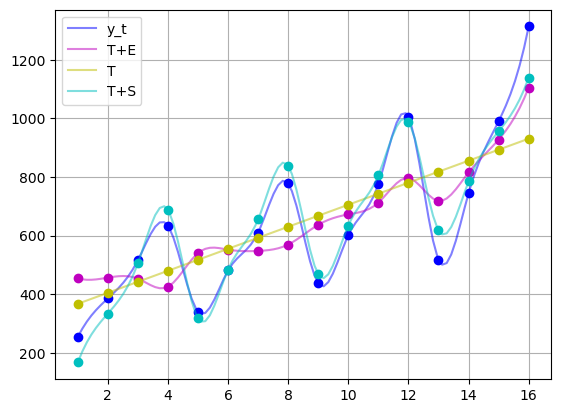

,e_t,(dyt - _y_t)**2,(y_t - dyt)**2,|y_t - dyt|/y_t
t,,,,
1,86.930735,232310.249027,7556.952739,34.265170
2,51.727971,99340.304949,2675.782941,13.425375
3,10.761873,20740.859579,115.817901,2.087657
4,-54.514225,1557.030476,2971.800781,8.602529
5,22.943010,110023.569708,526.381699,6.747944
6,-3.059755,27190.441856,9.362100,0.636388
7,-44.825853,39.323597,2009.357092,7.346092
8,-60.701951,36003.905406,3684.726853,7.804314
9,-30.844716,32909.691255,951.396486,7.066372


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,lower_boarder,upper_boarder
0,601.703533,934.136801
1,765.090530,1104.355332
2,932.540253,1279.237806
3,1112.018265,1466.711990


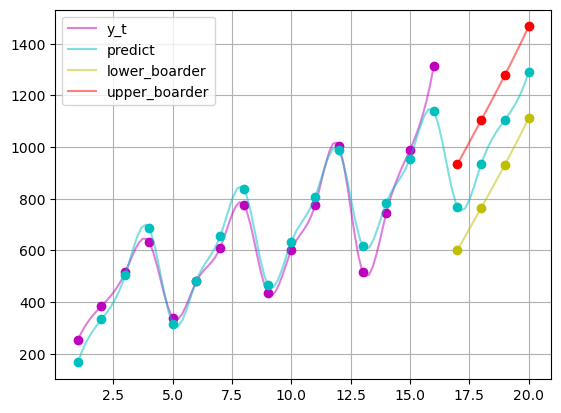

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def addition_model_auto_reg(origin_data, n_new, text_show = True):   
    def display_txt(lst):
        if type(lst)==list:
            
            for text in lst:
                try:
                    display(Math(text.replace(' ','~')))
                except:
                    display(Math(str(text)))
        else:
            try:
                display(Math(lst.replace(' ','~')))
            except:
                display(Math(str(lst)))
                
    def smooth_plot(datas = [], indices = [], xfroms = [], markers = [],last = True,dropna = True):
            
        if xfroms == []:
            xfroms = [1]*len(indices)
        
        lines = []
            
        for i in range(len(indices)):
            # Данные
            if dropna:
                y = datas[i][indices[i]].dropna().values
            else:
                y = datas[i][indices[i]].values
            x = np.arange(xfroms[i], y.size+xfroms[i], dtype = float)
            # Создание сглаживающей функции
            cs = CubicSpline(x, y)
            
            # Генерация новых точек для плавного графика
            x_smooth = np.linspace(x.min(), x.max(), 100)
            y_smooth = cs(x_smooth)
            
            if len(markers):
                plt.plot(x, y, markers[i]+'o')  # Оригинальные точки
                lines.append(plt.plot(x_smooth, y_smooth, markers[i]+'-', alpha = 0.5, label = indices[i]))  # Сглаженный график
            
            
        if last:
            plt.legend()
            plt.grid()
            plt.show()
    
    def bar_plot_dict(r:dict):
        # Данные для коррелограммы
        lags = r.keys()
        correlations = r.values()

        # Создание графика
        fig, ax = plt.subplots()
        bars = ax.bar(lags, correlations, color='lightblue')

        # Добавление значений на вершины столбцов
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 8), ha='center', va='bottom')

        # Настройка осей и заголовков
        ax.set_xlabel('Лаг')
        ax.set_ylabel('Корреляция')
        ax.set_ylim(0, 0.6)

        # Отображение графика
        plt.show()
    
    
    y = origin_data.values.ravel()
    
    n_new = origin_data.shape[1] * n_new
    display_txt(n_new)
    data = pd.DataFrame(origin_data.values.ravel().reshape(-1,1),index=pd.RangeIndex(1,origin_data.values.size+1,name='t'),columns=['y_t'])
    
    display(data)
    
    
    data['(y_t - _y)**2'] = (data['y_t'] - data['y_t'].mean())**2
    r = dict()
    for i in range(1,n_new+1):
        data[f'y_t-{i}'] =data['y_t'].shift(i)
        data[f'{i}'] = (data['y_t'] - data['y_t'].mean())*(data[f'y_t-{i}'] - data['y_t'].mean())
        r[f'{i}'] = data[f'{i}'].sum()/data['(y_t - _y)**2'].sum()
    
    
    
    if text_show:
        display_txt(
        '''Для выявления структуры имеющегося временного ряда проведем автокорреляционный анализ.
        Пользуясь данными итоговой строки таблицы,
        рассчитаем коэффициенты автокорреляции 1-го, 2-го, 3-го и 4-го порядков. '''.split('\n')
    )
    
    display(data)
    
    bar_plot_dict(r)
    
    
    txt1_1 = f'''Из графика коррелограммы и значений коэффициентов автокорреляции видно,
    что наиболее тесная связь наблюдается при временном лаге {n_new} при умеренном коэффициенте
    автокорреляции 1-го порядка. Из этого следует, что во временном ряду наряду с тенденцией
    T присутствуют сезонные колебания S с периодичностью в {n_new} квартала, то есть характер
    динамики инвестиций в основной капитал ежегодно повторяется.
    Данные предположения также подтверждаются графиком динамики
    наблюдаемых значений исследуемого показателя '''
    if text_show:
        display_txt(txt1_1.split('\n'))
    
    
    
    smooth_plot([data],['y_t'],[1],['b'])
    
    txt1 = '''Из графика поквартальной динамики инвестиций в основной капитал видно,
    что амплитуда колебаний постепенно увеличивается, следовательно,
    для моделирования такого временного ряда, целесообразнее использовать мультипликативную модель.
    Впоследствии данный факт будет доказан сравнением показателей качества аддитивной и мультипликативной моделей.  
    Как было сказано выше, построение аддитивной и мультипликативной моделей производится в шесть шагов.
    Для начала построим аддитивную модель. '''
    if text_show:
        display_txt(txt1.split('\n'))
    
    if text_show:
        display_txt(' Произведем выравнивание исходного временного ряда с помощью скользящей средней ')
    data2 = pd.DataFrame(y.reshape(-1,1), columns=['y_t'])

    
    k4 =[]
    yc_t = []
    for i in range(y.size - (n_new-1)):
        k4.append(sum([y[i+j] for j in range(n_new)]))
        yc_t.append(sum([y[i+j] for j in range(n_new)])/n_new)
        
    
    
    data2['4k'] = [pd.NA]*(n_new//2) + k4 + [pd.NA]*(n_new - n_new//2 - 1)
    data2['yc_t'] = [pd.NA]*(n_new//2) + yc_t + [pd.NA]*(n_new - n_new//2 - 1)
    data2['_ycc_t'] = [pd.NA]*(n_new//2) + [(data2['yc_t'][i]+data2['yc_t'][i+1])/2 for i in range(n_new//2,y.size-n_new//2 - n_new%2)] + [pd.NA]*(n_new - n_new//2)
    data2['mark'] = (data2['y_t'] - data2['_ycc_t'])


    display(data2)
    if text_show:
        display_txt('Произведя подобные преобразования, мы сгладили имевшиеся в исходном временном ряду t y сезонные колебания, что хорошо заметно на рисунке:')        
    smooth_plot([data,data2],['y_t','yc_t'], [1,3],['b','m'])
    
    txt2='''Шаг 2. Найдем оценки сезонной компоненты как разность между фактическими уровнями ряда t y
    и центрированными скользящими средними cц t y .
    Далее перенесем полученные разности  в таблицу согласно соответствующему году и кварталу.'''
    if text_show:
        display_txt(txt2.split('\n'))
    marks = data2['mark'].fillna(0).values.reshape(*origin_data.shape).astype(float)
    display(marks)
    
    _S_i = marks.sum(axis=0)/np.count_nonzero(marks,0)
    
    _S_i
    txt2_l_5 = 'Затем рассчитаем средние оценки сезонных колебаний S по всем годам для каждого квартала в отдельности: '
    display_txt([txt2_l_5]+list(_S_i))
    
    _S = (_S_i).sum()
    
    txt2_l_4 = """При моделировании периодических колебаний обычно предполагается,
    что сезонные воздействия за период взаимопогашаются. В аддитивной модели это выражается в том,
    что сумма значений сезонной компоненты по всем кварталам должна быть равна нулю. В нашем же случае: """
    display_txt(txt2_l_4.split('\n')+[_S])
    
    k = _S/4
    
    txt2_l_3 = '''Для устранения данного противоречия скорректируем полученные
    средние значения оценок сезонной компоненты S таким образом.
    Величина корректирующего коэффициента будет следующей:  '''
    display_txt(txt2_l_3.split('\n')+[k])
    
    d_S_i = _S_i - k
    d_S_i
    
    txt2_l_2 = 'Теперь рассчитаем скорректированные значения сезонной компоненты S как &&& разность между ее средней оценкой S и корректирующим коэффициентом k: '
    display_txt(txt2_l_2.split('&&&') + list(d_S_i))
    
    
    
    txt2_l_1 = 'Проверим условие взаимопогашаемости значений сезонной компоненты: '
    display_txt([txt2_l_1,f'{d_S_i.sum()}' +r' \approx 0'])
    
    
    txt2_l = 'Перенесем полученные значения S в таблицу напротив соответствующих кварталов каждого года.'
    display_txt(txt2_l)
    
    data3 = pd.DataFrame(data.loc[:,'y_t'])
    data3['S'] = list(d_S_i)*4
    display(data3)
    
    
    
    txt3='''Шаг 3. Исключим влияние сезонной компоненты S, вычитая ее соответствующие значения S из каждого уровня исходного временного ряда t y. 
    Таким образом получим:  T + E = Yt – S.
    Эти значения рассчитываются для каждого момента времени и содержат только тенденцию T  и случайную компоненту E. 
    '''
    if text_show:
        display_txt(txt3.split('\n'))
    
    data3['T+E'] = data3['y_t'] - data3['S']
    display(data3)

    b0, b1 = symbols('b0 b1')

    # Запись уравнений системы
    eq1 = Eq(data3.index.size * b0 + pd.Series(data3.index).sum() * b1, data3['T+E'].sum())
    eq2 = Eq(pd.Series(data3.index).sum() * b0 + (pd.Series(data3.index)**2).sum() * b1, (data3.index*data3['T+E']).sum())

    # Решение системы уравнений
    solution = solve((eq1, eq2), (b0, b1))

    # Вывод решения
    print("b0 =", solution[b0])
    print("b1 =", solution[b1])
    b0 = float(solution[b0])
    b1 = float(solution[b1])
    
    
    
    data3['T'] = pd.Series(b0 + np.arange(0,data.shape[0] +1)*b1)
    data3['T+S'] = data3['T']+data3['S']
    data3            
    display(data3)       
    
    smooth_plot([data3]*4,['y_t','T+E','T','T+S'],markers=['b','m','y','c'])
    
    data['e_t'] =  data['y_t'] - data3['T+S']
    data4 = pd.DataFrame(data.loc[:,'e_t'])
    data4['(dyt - _y_t)**2'] = (data3['T+S'] - data['y_t'].mean())**2
    data4['(y_t - dyt)**2'] = (data3['T+S'] - data['y_t'])**2
    data4['|y_t - dyt|/y_t'] = np.abs(data3['T+S'] - data['y_t'])/data['y_t'] * 100
    
    display(data4)
    
    if text_show:
        display_txt('В оцененном виде аддитивную модель изучаемого временного ряда можно представить следующим образом: ')
    
    display_txt(f'y = {b0} + {b1}' + r'\times t + \hat{S_i} + e_t')
    
    display_txt(r'\hat{S_i} = ' + f'{list(d_S_i)}')
    
    def hat_y(t):
        return b0 + b1*t + d_S_i[t%len(d_S_i)-1]

    h_y = np.vectorize(hat_y)


    predicted = h_y(range(data.shape[0] +1 ,data.shape[0] +1 + n_new))

    display_txt(['\nПредсказанные значения:\n', *predicted])
    
    
    S_e = np.sqrt(data4['(y_t - dyt)**2'].sum()/(data.shape[0] - 1 - 1))
    
    display_txt(f'\nРассчитаем стандартную ошибку регрессии: {S_e}\n')
    
    
    def s_e(t):
        return S_e * np.sqrt(1 + 1/data.shape[0] + (t - np.mean(data.index))**2/np.sum((data.index - np.mean(data.index))**2))

    std = np.vectorize(s_e)


    errors = std(range(data.shape[0] +1 ,data.shape[0] +1 + n_new))

    display_txt(['\nCтандартные ошибки прогноза будут следующими:\n',*errors])
    
    # Нахождение критического значения t
    degrees_of_freedom = data.shape[0] - 2
    t_critical = t.ppf(1 - (1 - alpha) / 2, degrees_of_freedom)
    
    lower_boarder = (h_y(range(data.shape[0] +1 ,data.shape[0] +1 + n_new)) - std(range(data.shape[0] +1 ,data.shape[0] +1 + n_new)) * t_critical)
    upper_boarder = (h_y(range(data.shape[0] +1 ,data.shape[0] +1 + n_new)) + std(range(data.shape[0] +1 ,data.shape[0] +1 + n_new)) * t_critical)

    display_txt(f"\nКритическое значение t_{{0.95;{degrees_of_freedom}}} = {t_critical:.2f}\n")
    
    
    data5 = pd.DataFrame(np.hstack((data3.iloc[:,4].values,predicted)),columns =['predict'])
    
    
    
    data6 = pd.DataFrame(np.vstack((lower_boarder, upper_boarder)).T, columns=['lower_boarder','upper_boarder'])
    display(data6)
    
    smooth_plot([data3,data5,data6,data6],['y_t','predict','lower_boarder','upper_boarder'],[1,1,data.shape[0]+1,data.shape[0]+1],markers=['m','c','y','r'])
    
    
    R2 = data4['(dyt - _y_t)**2'].sum()/(data4['(dyt - _y_t)**2'].sum() + data4['(y_t - dyt)**2'].sum())
    display_txt(['- коэффициент детерминации',R2])
    
    A_ = data4['|y_t - dyt|/y_t'].mean()
    display_txt(['- средняя ошибка аппроксимации', f'{A_}%'])
    
addition_model_auto_reg(origin_data, n_new)

,1,2,3,4
2002,253.7,385.30,515.5,633.7
2003,340.0,480.80,610.2,777.8
2004,436.5,601.18,775.0,1004.8
2005,517.8,744.30,990.0,1313.5


<IPython.core.display.Math object>

,y_t
t,
1,253.70
2,385.30
3,515.50
4,633.70
5,340.00
6,480.80
7,610.20
8,777.80
9,436.50


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,y_t,(y_t - _y)**2,y_t-1,1,y_t-2,2,y_t-3,3,y_t-4,4
t,,,,,,,,,,
1,253.70,156068.453025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,385.30,69408.537025,253.70,104079.215025,NaN,NaN,NaN,NaN,NaN,NaN
3,515.50,17756.895025,385.30,35106.696025,253.70,52643.054025,NaN,NaN,NaN,NaN
4,633.70,226.653025,515.50,2006.154025,385.30,3966.315025,253.70,5947.553025,NaN,NaN
5,340.00,95329.650025,633.70,4648.306525,515.50,41143.147525,385.30,81343.048525,253.70,121975.206525
6,480.80,28208.882025,340.00,51856.946025,633.70,2528.562525,515.50,22380.843525,385.30,44248.584525
7,610.20,1486.488025,480.80,6475.505025,340.00,11904.049025,633.70,580.445525,515.50,5137.646525
8,777.80,16652.612025,610.20,-4975.329975,480.80,-21673.752975,340.00,-39843.288975,633.70,-1942.772475
9,436.50,45052.185025,777.80,-27390.446475,610.20,8183.491525,480.80,35649.288525,340.00,65534.792525


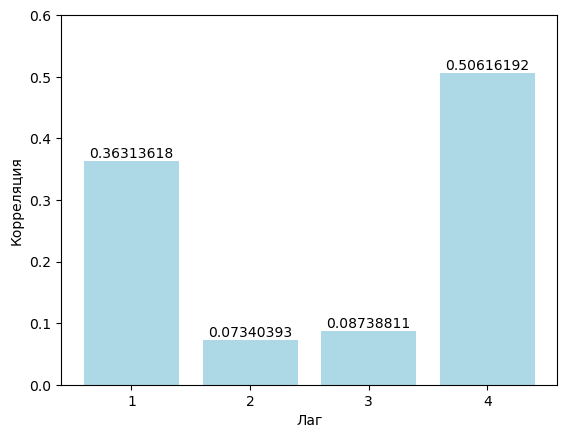

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

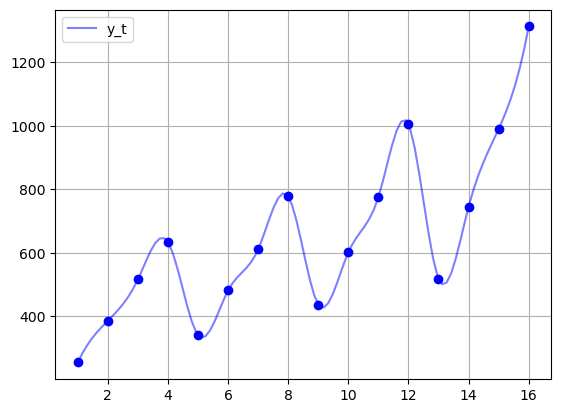

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,y_t,4k,yc_t,_ycc_t,mark
0,253.70,<NA>,<NA>,<NA>,<NA>
1,385.30,<NA>,<NA>,<NA>,<NA>
2,515.50,1788.2,447.05,457.8375,1.125945
3,633.70,1874.5,468.625,480.5625,1.318663
4,340.00,1970.0,492.5,504.3375,0.674152
5,480.80,2064.7,516.175,534.1875,0.900059
6,610.20,2208.8,552.2,564.2625,1.081412
7,777.80,2305.3,576.325,591.3725,1.315245
8,436.50,2425.68,606.42,627.02,0.69615
9,601.18,2590.48,647.62,675.995,0.889326


<IPython.core.display.Math object>

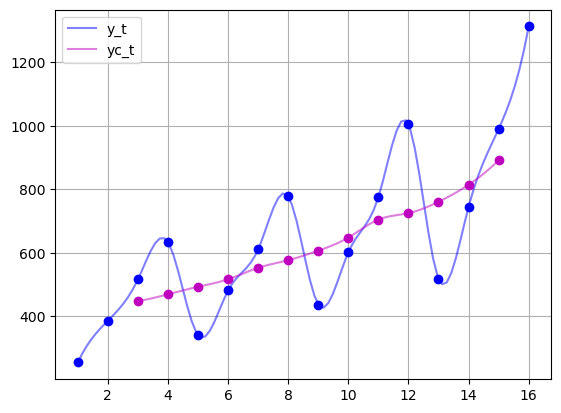

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

array([[0.        , 0.        , 1.12594534, 1.31866303],
       [0.67415173, 0.9000585 , 1.08141158, 1.31524547],
       [0.69615004, 0.8893261 , 1.08462526, 1.35311109],
       [0.65764908, 0.87275925, 0.        , 0.        ]])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,y_t,S
t,,
1,253.70,0.677729
2,385.30,0.889672
3,515.50,1.100161
4,633.70,1.332438
5,340.00,0.677729
6,480.80,0.889672
7,610.20,1.100161
8,777.80,1.332438
9,436.50,0.677729


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,y_t,S,TE
t,,,
1,253.70,0.677729,374.338433
2,385.30,0.889672,433.080735
3,515.50,1.100161,468.567940
4,633.70,1.332438,475.594380
5,340.00,0.677729,501.675472
6,480.80,0.889672,540.423611
7,610.20,1.100161,554.646279
8,777.80,1.332438,583.742006
9,436.50,0.677729,644.062774


b0 = 326.107355221838
b1 = 36.6100928749787


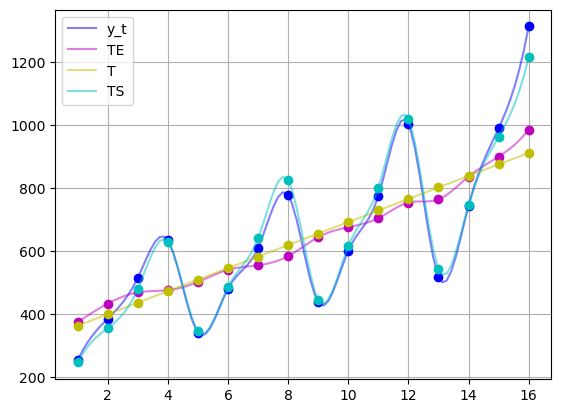

,y_t,S,TE,T,TS
t,,,,,
1,253.70,0.677729,374.338433,362.717448,245.824122
2,385.30,0.889672,433.080735,399.327541,355.270713
3,515.50,1.100161,468.567940,435.937634,479.601422
4,633.70,1.332438,475.594380,472.547727,629.640523
5,340.00,0.677729,501.675472,509.157820,345.071004
6,480.80,0.889672,540.423611,545.767912,485.554678
7,610.20,1.100161,554.646279,582.378005,640.709353
8,777.80,1.332438,583.742006,618.988098,824.763231
9,436.50,0.677729,644.062774,655.598191,444.317886


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,e_t,(dyt - _y_t)**2,(y_t - dyt)**2,|y_t - dyt|/y_t
t,,,,
1,7.875878,162353.292378,62.029453,3.104406
2,30.029287,86133.026598,901.758066,7.793742
3,35.898578,28612.932953,1288.707903,6.963837
4,4.059477,365.363232,16.479354,0.640599
5,-5.071004,92223.969391,25.715082,1.491472
6,-4.754678,26634.345156,22.606961,0.988910
7,-30.509353,64.732429,930.820644,4.999894
8,-46.963231,30978.897365,2205.545062,6.037957
9,-7.817886,41794.533567,61.119342,1.791039


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,lower_boarder,upper_boarder
0,556.512564,729.110736
1,788.334032,964.479112
2,1034.031079,1214.035217
3,1318.053494,1502.209216


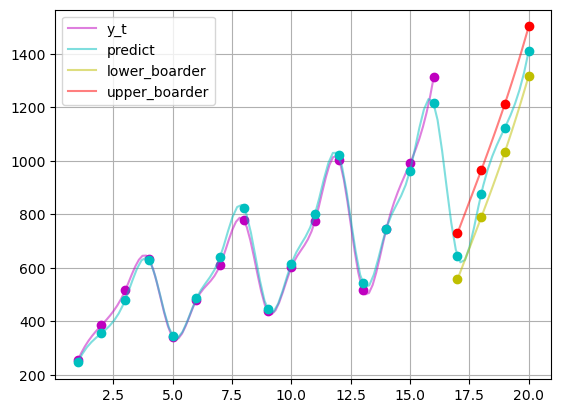

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
n_new = 1

def multiplication_model_auto_reg(origin_data, n_new, text_show = True):   
    def display_txt(lst):
        if type(lst)==list:
            
            for text in lst:
                try:
                    display(Math(text.replace(' ','~')))
                except:
                    display(Math(str(text)))
        else:
            try:
                display(Math(lst.replace(' ','~')))
            except:
                display(Math(str(lst)))
                
    def smooth_plot(datas = [], indices = [], xfroms = [], markers = [],last = True,dropna = True):
            
        if xfroms == []:
            xfroms = [1]*len(indices)
        
        lines = []
            
        for i in range(len(indices)):
            # Данные
            if dropna:
                y = datas[i][indices[i]].dropna().values
            else:
                y = datas[i][indices[i]].values
            x = np.arange(xfroms[i], y.size+xfroms[i], dtype = float)
            # Создание сглаживающей функции
            cs = CubicSpline(x, y)
            
            # Генерация новых точек для плавного графика
            x_smooth = np.linspace(x.min(), x.max(), 100)
            y_smooth = cs(x_smooth)
            
            if len(markers):
                plt.plot(x, y, markers[i]+'o')  # Оригинальные точки
                lines.append(plt.plot(x_smooth, y_smooth, markers[i]+'-', alpha = 0.5, label = indices[i]))  # Сглаженный график
            
            
        if last:
            plt.legend()
            plt.grid()
            plt.show()
    
    def bar_plot_dict(r:dict):
        # Данные для коррелограммы
        lags = r.keys()
        correlations = r.values()

        # Создание графика
        fig, ax = plt.subplots()
        bars = ax.bar(lags, correlations, color='lightblue')

        # Добавление значений на вершины столбцов
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 8), ha='center', va='bottom')

        # Настройка осей и заголовков
        ax.set_xlabel('Лаг')
        ax.set_ylabel('Корреляция')
        ax.set_ylim(0, 0.6)

        # Отображение графика
        plt.show()
    
    
    y = origin_data.values.ravel()
    
    n_new = origin_data.shape[1] * n_new
    display_txt(n_new)
    data = pd.DataFrame(origin_data.values.ravel().reshape(-1,1),index=pd.RangeIndex(1,origin_data.values.size+1,name='t'),columns=['y_t'])
    
    display(data)
    
    
    data['(y_t - _y)**2'] = (data['y_t'] - data['y_t'].mean())**2
    r = dict()
    for i in range(1,n_new+1):
        data[f'y_t-{i}'] =data['y_t'].shift(i)
        data[f'{i}'] = (data['y_t'] - data['y_t'].mean())*(data[f'y_t-{i}'] - data['y_t'].mean())
        r[f'{i}'] = data[f'{i}'].sum()/data['(y_t - _y)**2'].sum()
    
    
    
    if text_show:
        display_txt(
        '''Для выявления структуры имеющегося временного ряда проведем автокорреляционный анализ.
        Пользуясь данными итоговой строки таблицы,
        рассчитаем коэффициенты автокорреляции 1-го, 2-го, 3-го и 4-го порядков. '''.split('\n')
    )
    
    display(data)
    
    bar_plot_dict(r)
    
    
    txt1_1 = f'''Из графика коррелограммы и значений коэффициентов автокорреляции видно,
    что наиболее тесная связь наблюдается при временном лаге {n_new} при умеренном коэффициенте
    автокорреляции 1-го порядка. Из этого следует, что во временном ряду наряду с тенденцией
    T присутствуют сезонные колебания S с периодичностью в {n_new} квартала, то есть характер
    динамики инвестиций в основной капитал ежегодно повторяется.
    Данные предположения также подтверждаются графиком динамики
    наблюдаемых значений исследуемого показателя '''
    if text_show:
        display_txt(txt1_1.split('\n'))
    
    
    
    smooth_plot([data],['y_t'],[1],['b'])
    
    txt1 = '''Из графика поквартальной динамики инвестиций в основной капитал видно,
    что амплитуда колебаний постепенно увеличивается, следовательно,
    для моделирования такого временного ряда, целесообразнее использовать мультипликативную модель.
    Впоследствии данный факт будет доказан сравнением показателей качества аддитивной и мультипликативной моделей.  
    Как было сказано выше, построение аддитивной и мультипликативной моделей производится в шесть шагов.
    Для начала построим аддитивную модель. '''
    if text_show:
        display_txt(txt1.split('\n'))
    
    if text_show:
        display_txt(' Произведем выравнивание исходного временного ряда с помощью скользящей средней ')
    data2 = pd.DataFrame(y.reshape(-1,1), columns=['y_t'])

    
    k4 =[]
    yc_t = []
    for i in range(y.size - (n_new-1)):
        k4.append(sum([y[i+j] for j in range(n_new)]))
        yc_t.append(sum([y[i+j] for j in range(n_new)])/n_new)
        
    
    
    data2['4k'] = [pd.NA]*(n_new//2) + k4 + [pd.NA]*(n_new - n_new//2 - 1)
    data2['yc_t'] = [pd.NA]*(n_new//2) + yc_t + [pd.NA]*(n_new - n_new//2 - 1)
    data2['_ycc_t'] = [pd.NA]*(n_new//2) + [(data2['yc_t'][i]+data2['yc_t'][i+1])/2 for i in range(n_new//2,y.size-n_new//2 - n_new%2)] + [pd.NA]*(n_new - n_new//2)
    data2['mark'] = (data2['y_t']/data2['_ycc_t'])


    display(data2)
    if text_show:
        display_txt('Произведя подобные преобразования, мы сгладили имевшиеся в исходном временном ряду t y сезонные колебания, что хорошо заметно на рисунке:')        
    smooth_plot([data,data2],['y_t','yc_t'], [1,3],['b','m'])
    
    txt2='''Шаг 2. Найдем оценки сезонной компоненты как частное от деления фактических уровней
    ряда t y на центрированные скользящие средние cц t y. 
    Далее рассчитаем средние значения сезонных колебаний для каждого квартала i S.
    Для этого перенесем имеющиеся оценки в таблицу'''
    if text_show:
        display_txt(txt2.split('\n'))
    marks = data2['mark'].fillna(0).values.reshape(*origin_data.shape).astype(float)
    display(marks)
    
    _S_i = marks.sum(axis=0)/np.count_nonzero(marks,0)
    
    txt2_l_5 = '''Взаимопогашаемость сезонных воздействий в мультипликативной модели выражается в том,
    что сумма значений i S сезонной компоненты S должна быть равна числу периодов в цикле,
    то есть для данного примера – четырем. Суммируя i S , получаем:  '''
    
    _S = (_S_i).sum()

    display_txt(txt2_l_5.split('\n')+list(_S_i) +['\n',_S])
    
    k = origin_data.shape[1]/_S
    
    txt2_l_3 = '''Рассчитаем корректирующий коэффициент:  
    '''
    display_txt(txt2_l_3.split('\n')+[k])
    
    d_S_i = _S_i*k
    
    display_txt(
        '''Определим скорректированные значения сезонной компоненты,
        умножив ее средние оценки i S на корректирующий коэффициент k: '''.split('\n')+ list(d_S_i)
    )
    
    display_txt('''Проверим выполнение свойства взаимопогашаемости сезонных колебаний в мультипликативной модели: '''.split('\n') +[np.sum(d_S_i)])

    display_txt('''Для выполнения последующих расчетов перенесем полученные значения S в таблицу в соответствии с каждым кварталом. ''')
    
    data3 = pd.DataFrame(data.loc[:,'y_t'])
    data3['S'] = list(d_S_i)*origin_data.shape[1]
    display(data3)
    
    txt3='''Шаг 3. Исключим из исходного временного ряда сезонные колебания,
    разделив каждый уровень t y на соответствующее значение i S.
    В итоге получим временной ряд, содержащий только тенденцию T и случайную компоненту E. '''
    if text_show:
        display_txt(txt3.split('\n'))
    
    data3['TE'] = data3['y_t']/data3['S']
    display(data3)
    
    b0, b1 = symbols('b0 b1')

    # Запись уравнений системы
    eq1 = Eq(data3.index.size * b0 + pd.Series(data3.index).sum() * b1, data3['TE'].sum())
    eq2 = Eq(pd.Series(data3.index).sum() * b0 + (pd.Series(data3.index)**2).sum() * b1, (data3.index*data3['TE']).sum())

    # Решение системы уравнений
    solution = solve((eq1, eq2), (b0, b1))

    # Вывод решения
    print("b0 =", solution[b0])
    print("b1 =", solution[b1])
    b0 = float(solution[b0])
    b1 = float(solution[b1])
    
    data3['T'] = pd.Series(b0 + np.arange(0,data.shape[0] +1)*b1)
    data3['TS'] = data3['T']*data3['S']
    smooth_plot([data3]*4,['y_t','TE','T','TS'],markers=['b','m','y','c'])
    
    data['e_t'] =  data['y_t']-data3['TS']
                
    display(data3)
    if text_show:
        display_txt('Таким образом, мультипликативную модель изучаемого временного ряда можно представить следующим образом: ')
    
    display_txt(f'y = ({b0} + {b1}' + r'\times t)\times \hat{S_i} \times e_t')
    
    data4 = pd.DataFrame(data.loc[:,'e_t'])
    data4['(dyt - _y_t)**2'] = (data3['TS'] - data['y_t'].mean())**2
    data4['(y_t - dyt)**2'] = (data3['TS'] - data['y_t'])**2
    data4['|y_t - dyt|/y_t'] = np.abs(data3['TS'] - data['y_t'])/data['y_t'] * 100
    
    display_txt(
        '''Для расчета показателей качества модели значения отн t e 
        относительной ошибки E  не могут быть использованы.
        Поэтому для оценки качества модели необходимо рассчитать значения
        абсолютной ошибки по формуле Eабс=Yt - (T·S), то есть )
        Значения остатков t e представлены в графе 1. 
        '''.split('\n')
    )
    
    display(data4)
    
    display_txt(r'\hat{S_i} = ' + f'{list(d_S_i)}')
    
    def hat_y(t):
        return (b0 + b1*t)* d_S_i[t%len(d_S_i)-1]

    h_y = np.vectorize(hat_y)


    predicted = h_y(range(data.shape[0] +1 ,data.shape[0] +1 + n_new))

    display_txt(['\nПредсказанные значения:\n', *predicted])
    
    
    S_e = np.sqrt(data4['(y_t - dyt)**2'].sum()/(data.shape[0] - 1 - 1))
    
    display_txt(f'\nРассчитаем стандартную ошибку регрессии: {S_e}\n')
    
    
    def s_e(t):
        return S_e * np.sqrt(1 + 1/data.shape[0] + (t - np.mean(data.index))**2/np.sum((data.index - np.mean(data.index))**2))

    std = np.vectorize(s_e)


    errors = std(range(data.shape[0] +1 ,data.shape[0] +1 + n_new))

    display_txt(['\nCтандартные ошибки прогноза будут следующими:\n',*errors])
    
    # Нахождение критического значения t
    degrees_of_freedom = data.shape[0] - 2
    t_critical = t.ppf(1 - (1 - alpha) / 2, degrees_of_freedom)
    
    lower_boarder = (h_y(range(data.shape[0] +1 ,data.shape[0] +1 + n_new)) - std(range(data.shape[0] +1 ,data.shape[0] +1 + n_new)) * t_critical)
    upper_boarder = (h_y(range(data.shape[0] +1 ,data.shape[0] +1 + n_new)) + std(range(data.shape[0] +1 ,data.shape[0] +1 + n_new)) * t_critical)

    display_txt(f"\nКритическое значение t_{{0.95;{degrees_of_freedom}}} = {t_critical:.2f}\n")
    
    data5 = pd.DataFrame(np.hstack((data3.iloc[:,4].values,predicted)),columns =['predict'])
    
    
    
    data6 = pd.DataFrame(np.vstack((lower_boarder, upper_boarder)).T, columns=['lower_boarder','upper_boarder'])
    display(data6)
    
    smooth_plot([data3,data5,data6,data6],['y_t','predict','lower_boarder','upper_boarder'],[1,1,data.shape[0]+1,data.shape[0]+1],markers=['m','c','y','r'])
    
    R2 = data4['(dyt - _y_t)**2'].sum()/(data4['(dyt - _y_t)**2'].sum() + data4['(y_t - dyt)**2'].sum())
    display_txt(['- коэффициент детерминации',R2])
    
    A_ = data4['|y_t - dyt|/y_t'].mean()
    display_txt(['- средняя ошибка аппроксимации', f'{A_}%'])
    
text_y = "253,7 385,3 515,5 633,7 340 480,8 610,2 777,8 436,5 601,18 775 1004,8 517,8 744,3 990 1313,5"
lst = list(map(float,text_y.replace(',','.').split()))
y = np.array(lst)

y_n = y.reshape(4,4)
origin_data = pd.DataFrame(y_n, columns=[1,2,3,4],index=[2002,2003,2004,2005])
display(origin_data)


multiplication_model_auto_reg(origin_data, n_new, text_show = True)